In [2]:
import numpy as np
from PIL import Image
import os
import sys
import cv2
from Otsu import Otsu
from CurveDetect import CurveDetect
from tools import delete_noise, show_prediction
import sys
sys.path.append("../main/")
from validation import validate
from Devide import Devide
from skimage import morphology
from fill import fill

In [4]:
i = 0

5
bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d


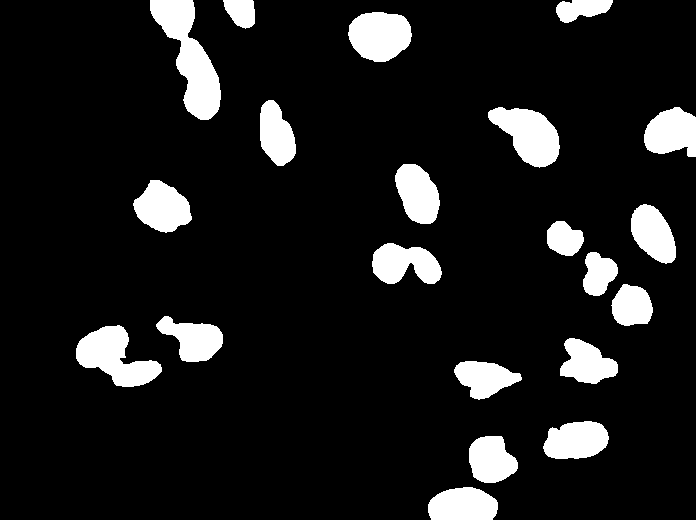

In [481]:
# test画像の分析
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/stage1_test/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/answer/"
COMPARE_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/answer_0368/"

print(i)
filenames = os.listdir(ANSWER_FILE_ROOT)
filename = filenames[i].split(".")[0]
print(filename)
i += 1

original_image =  Image.open(TEST_FILE_ROOT + filename + '/images/' + filename + ".png")
predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")
compare_image = Image.open(COMPARE_FILE_ROOT + filename + ".png") 

predicted_mask

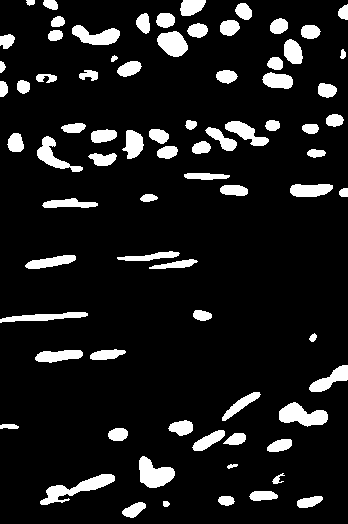

In [477]:
Image.fromarray(fill(np.asarray(predicted_mask)))

In [399]:
img = np.asarray(predicted_mask)

In [445]:
img.shape

(519, 161)

In [451]:
thresh = len(img.flatten()) / 5

In [450]:
img2 = morphology.label(img, background=100000000)

In [428]:
np.unique(img2, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 array([    8,   243, 52227,   388,     4,  1183,    58,   241,   664,
          546,   625,   265,  1009,    16,   325,    10,   944,   707,
         1647,   214,     5,    19,   389,   866,   473,     2,  1231,
         2829,     6,     4,     1,  1696,   995,  1137,    22,    30,
           26,    18,   326,    24,   640,   879,    40,   253,  4766,
            7,   790,     2,    51,     2,     2,     4,     8,    15,
         1553,     7,    20,    17,   233,   132,   666,   453,   213,
          344,   520,   457,    62]))

In [431]:
np.unique(img2, return_counts=True)[1].argmax()

2

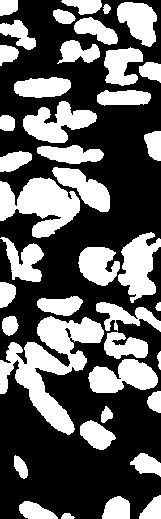

In [425]:
Image.fromarray((img2 != 3).astype(np.uint8) * 255)

49
0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466


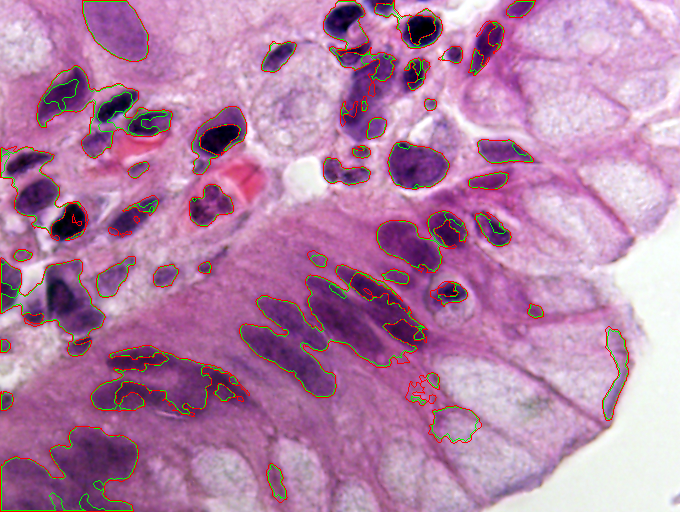

In [55]:
# test画像の分析
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/stage1_test/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/answer/"
COMPARE_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/answer_0368/"

print(i)
filenames = os.listdir(ANSWER_FILE_ROOT)
filename = filenames[i].split(".")[0]
print(filename)
i += 1

original_image =  Image.open(TEST_FILE_ROOT + filename + '/images/' + filename + ".png")
predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")
compare_image = Image.open(COMPARE_FILE_ROOT + filename + ".png") 

original_image_array = np.asarray(original_image)[:, :, :3].copy()
predicted_mask_array = np.asarray(predicted_mask) # green
compare_image_array = np.asarray(compare_image) # red
#devide = Devide(original_image_array, predicted_mask_array)
#predicted_mask_array = devide.make_mask()

dst = show_prediction(original_image_array, predicted_mask_array, compare_image_array)
dst

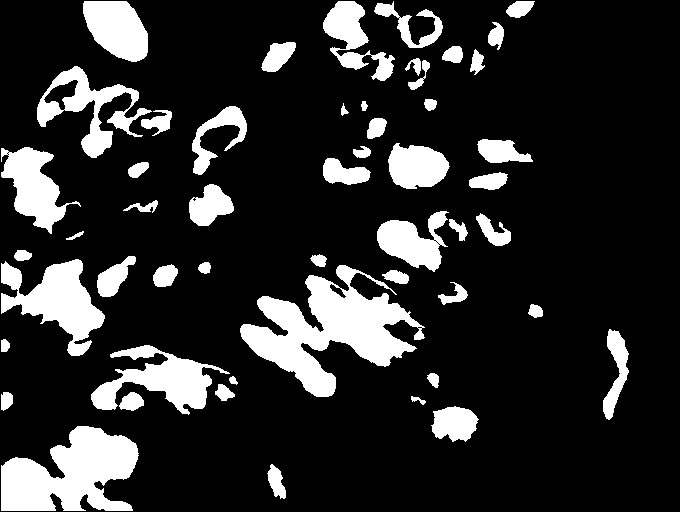

In [56]:
Image.fromarray(predicted_mask_array)

In [7]:
i = 0

12
351771edfc5db5665ded8aa4940257276b6526663c76e3b60b92a52584d8943c.png
score:  0.4348611171928142
0.5 : 0.7946428571428571
0.55 : 0.7787610619469026
0.6 : 0.7327586206896551
0.65 : 0.6341463414634146
0.7 : 0.47794117647058826
0.75 : 0.3958333333333333
0.8 : 0.2967741935483871
0.85 : 0.1686046511627907
0.9 : 0.06914893617021277
0.95 : 0.0


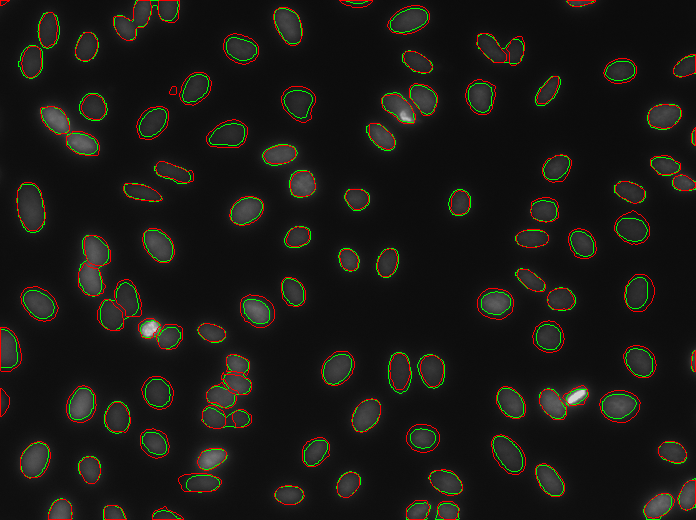

In [344]:
# validation画像の分析
TRAIN_FILE_ROOT_COLOR = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default_color/"
TRAIN_FILE_ROOT_GRAY  = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default_gray/"
VALIDATION_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/answer_val13/"
TRAIN_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default/"

print(i)
filenames = os.listdir(VALIDATION_FILE_ROOT)
filename = filenames[i]
print(filename)
i += 1

original_image =  Image.open(TRAIN_FILE_ROOT + '/images/' + filename)
predicted_mask = Image.open(VALIDATION_FILE_ROOT + filename )
gt_mask = Image.open(TRAIN_FILE_ROOT + 'masks/' + filename)
original_image_array = np.asarray(original_image)[:, :, :3].copy()  # なぜかcopyを入れないと動かない・・・
predicted_mask_array = np.asarray(predicted_mask)
gt_mask_array = np.asarray(gt_mask)

val, vs, _ = validate(predicted_mask_array, gt_mask_array)
threshold = np.linspace(0.5, 0.95, 10)
threshold = np.around(threshold, decimals=2)
print("score: ", val)
for v, thresh in zip(vs, threshold):
    print(thresh, ":", v)
    
dst = show_prediction(original_image_array, predicted_mask_array, gt_mask_array)
dst

In [19]:
tmp = Devide(original_image_array, predicted_mask_array)

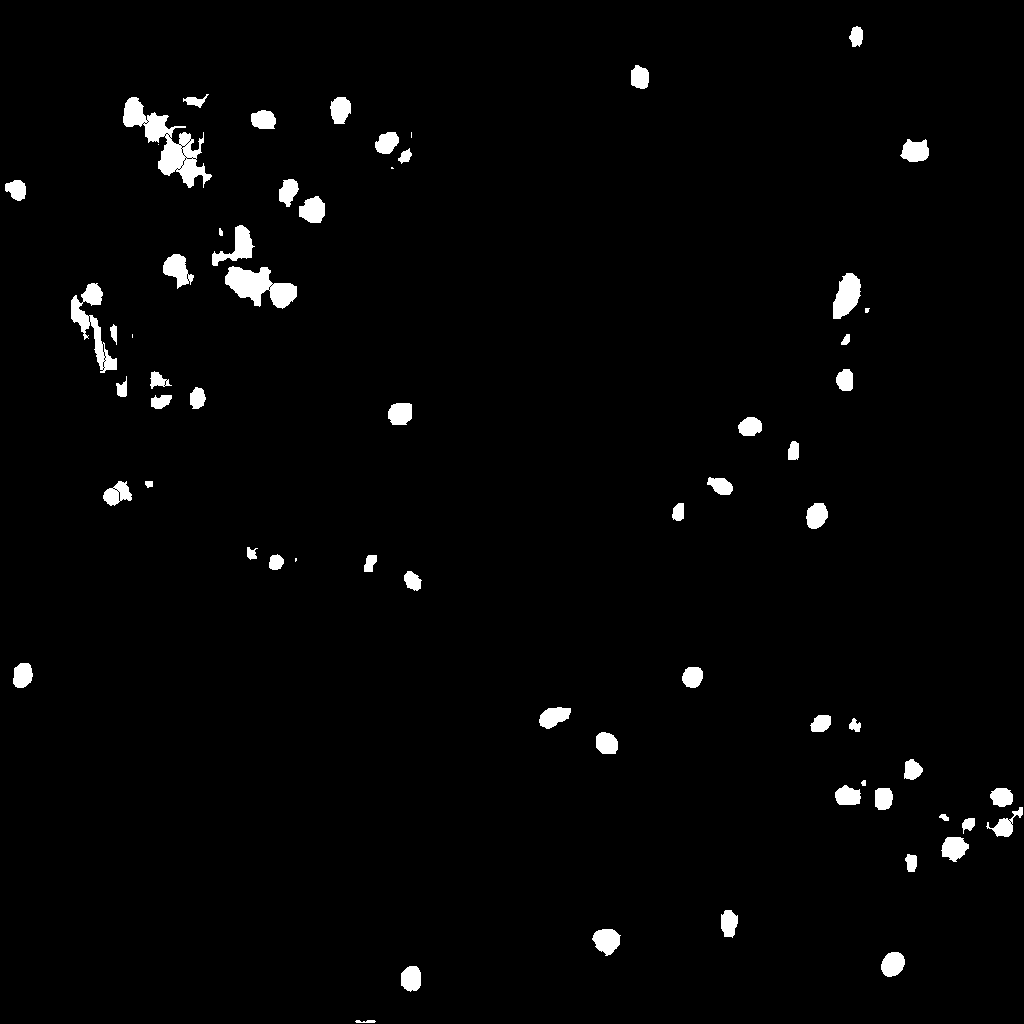

In [20]:
Image.fromarray(((tmp.data() != 1) * (tmp.data() != -1) * 255).astype(np.uint8))

In [71]:
i = 0

In [103]:
# test画像の分析
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/Tissue_images/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/tmp/"

print(i)
filenames = os.listdir(ANSWER_FILE_ROOT)
filename = filenames[i].split(".png")[0]
print(filename)
i += 1
#filename = "TCGA-18-5592-01Z-00-DX1"

original_image =  Image.open(TEST_FILE_ROOT + filename + ".tif-0.png")
predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")

original_image_array = np.asarray(original_image)[:, :, :3].copy()
predicted_mask_array = np.asarray(predicted_mask) # green
#devide = Devide(original_image_array, predicted_mask_array)
#predicted_mask_array = devide.make_mask()

dst = show_prediction(original_image_array, predicted_mask_array)
dst

30


IndexError: list index out of range